# Time to train some models!!!

In [2]:
# Load Iris dataset
import pandas as pd

iris_data = pd.read_csv('../iris_data/iris.csv')
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [5]:
y_train.head()

81     versicolor
133     virginica
137     virginica
75     versicolor
109     virginica
Name: species, dtype: object

## Models to train 

### Logistic Regression 

Mean cross-validation score: 0.961905


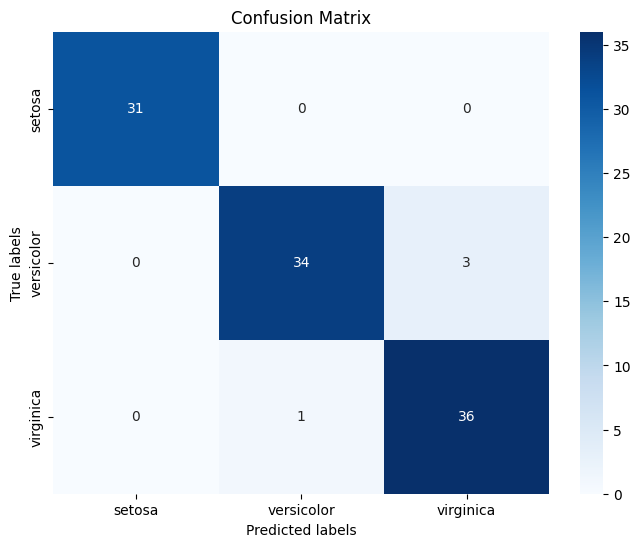

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine (SVM)

Mean cross-validation score: 0.952381


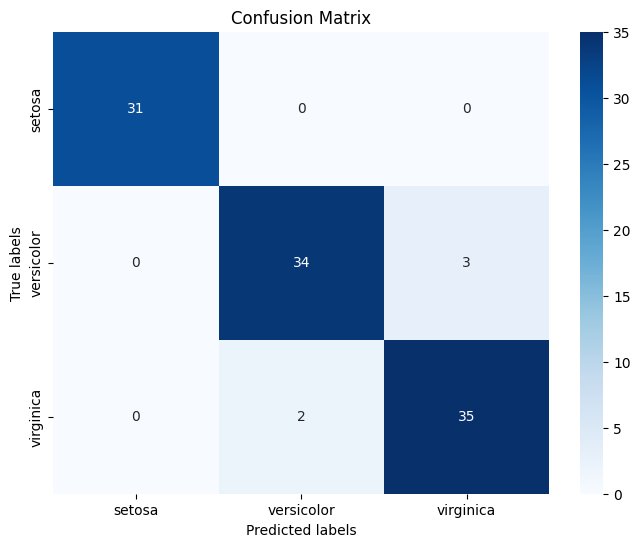

In [7]:
# SVM
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier

Mean cross-validation score: 0.933333


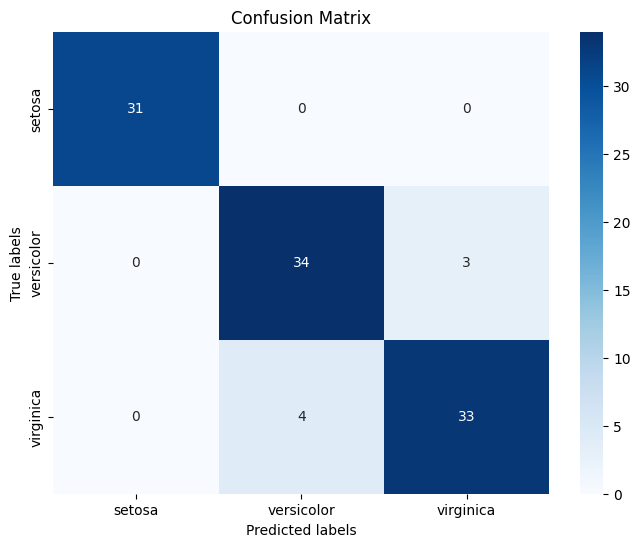

In [8]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

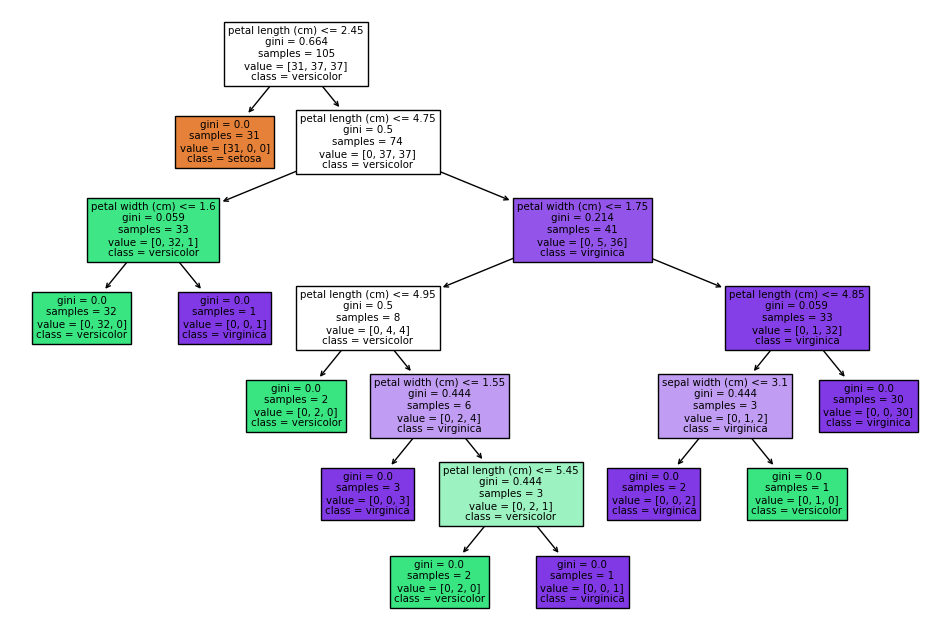

In [9]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=iris_data['species'].unique())
plt.show()

### K-Nearest Neighbours¶


Mean cross-validation score: 0.933333


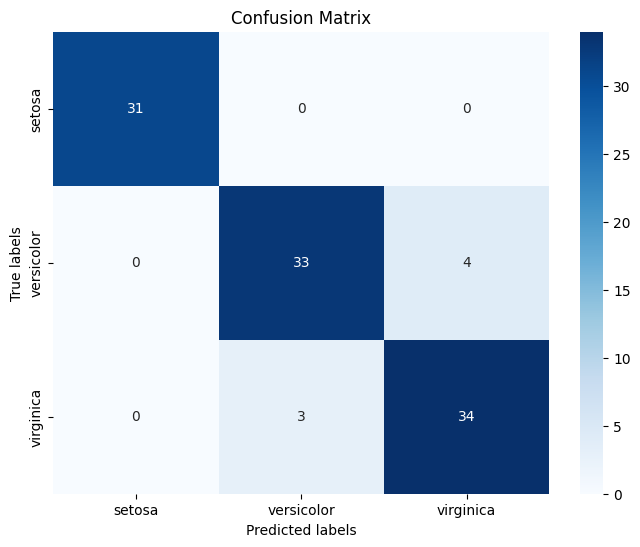

In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Mean cross-validation score: 0.942857


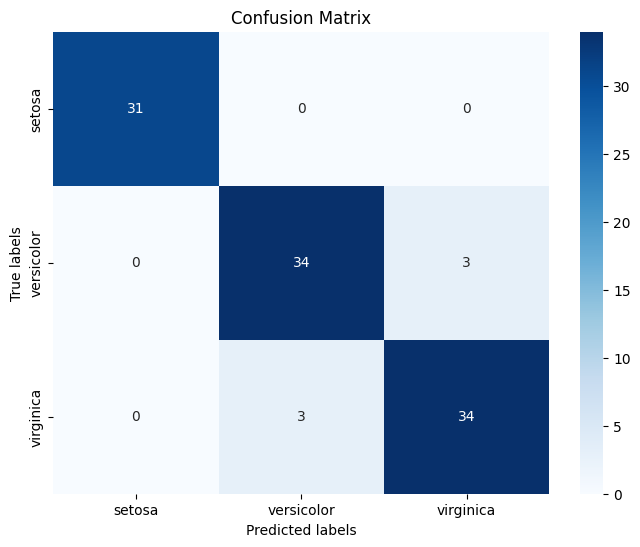

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Mean cross-validation score: 0.933333


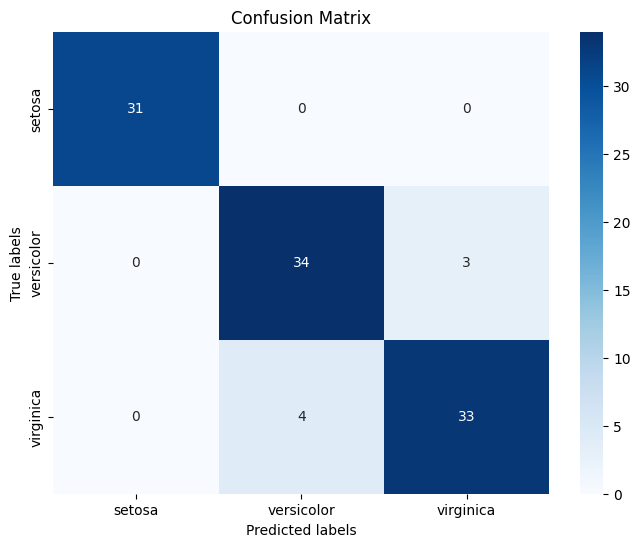

In [12]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean cross-validation score: %f" % scores.mean())

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx, annot=True, cmap='Blues', xticklabels=iris_data['species'].unique(), 
            yticklabels=iris_data['species'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Save the Model

In [14]:
from joblib import dump

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

dump(lr_model, 'lr_model.joblib')


['lr_model.joblib']